# 1. Введение

✍ Вы прошли все необходимые модули разведывательного анализа данных — теперь пришло время переходить к настоящей практике! В этом проекте мы применим свои знания и навыки на реальной задаче. Готовы приступать?

В результате работы над данным проектом вы:

✔️ создадите свою первую модель, основанную на алгоритмах машинного обучения;

✔️ примете участие в соревновании на Kaggle;

✔️ поймёте, как правильно «подготовить» данные, чтобы ваша модель работала лучше.

### Чем мы будем заниматься?

В этом модуле вы попробуете решить свой первый настоящий кейс и создадите первую модель, использующую алгоритмы машинного обучения.

→ Не пугайтесь, вам не придётся изучать машинное обучение в экстремально короткие сроки! На самом деле код для создания и обучения модели мы вам предоставим в готовом виде, и этот код будет довольно простым. Всему этому более подробно вы научитесь позже, в модулях по машинному обучению. Пока ваша задача будет состоять в том, чтобы качественно подготовить данные для обучения модели.

Скоро вы убедитесь не только в теории, но и на практике, что тщательная очистка данных, проектирование признаков и разведывательный анализ данных способны повысить точность модели в два и более раз, и владение этими навыками играет в машинном обучении не меньшую роль, чем умение выбрать алгоритм и настроить модель.

Итак, вы создадите свою первую модель, а после этого используете свои навыки для участия в соревновании на платформе Kaggle.

### Какой кейс решаем?

Представьте, что вы работаете дата-сайентистом в компании Booking. Одна из проблем компании — это нечестные отели, которые накручивают себе рейтинг. Одним из способов обнаружения таких отелей является построение модели, которая предсказывает рейтинг отеля. Если предсказания модели сильно отличаются от фактического результата, то, возможно, отель ведёт себя нечестно, и его стоит проверить.

Вам поставлена задача создать такую модель. Готовы приступить?

# 2. Разбираемся с данными

 В этом модуле вы будете работать с датасетом, в котором содержатся сведения о 515 000 отзывов на отели Европы. Модель, которую вы будете обучать, должна предсказывать рейтинг отеля по данным сайта Booking на основе имеющихся в датасете данных. Изученные нами навыки разведывательного анализа помогут улучшить модель. Как? Узнаем дальше.

Первоначальная версия датасета содержит 17 полей со следующей информацией:

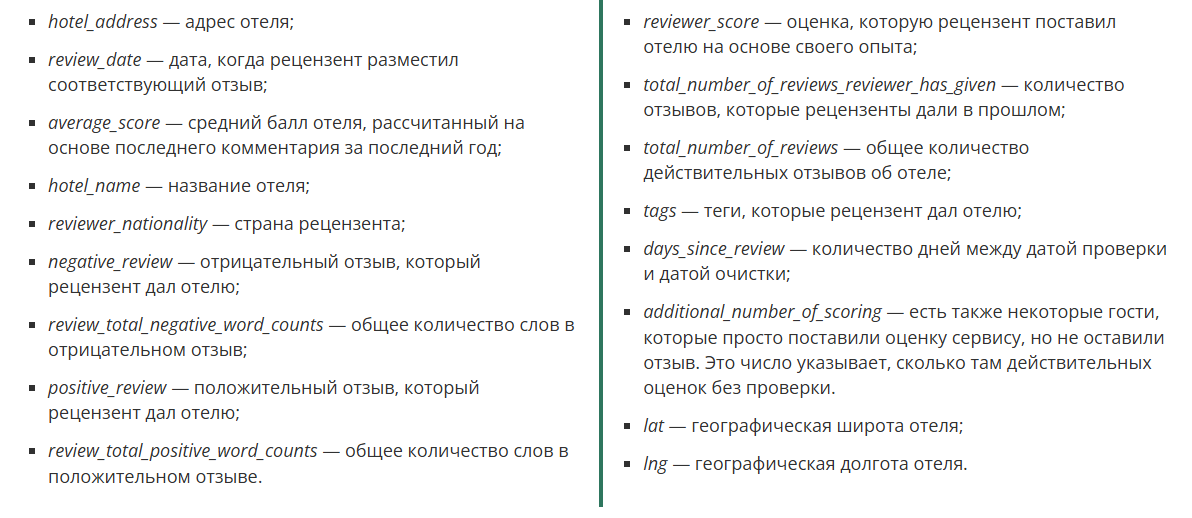

In [40]:
import pandas as pd

hotels = pd.read_csv('data/hotels.csv')
hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


✍ Ответы на вопросы ниже помогут вам лучше сориентироваться в файле, а также покажут некоторые важные особенности, которые необходимо будет учесть при создании модели.

In [41]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

# 3. Машинное обучение для самых маленьких

✍ Что нужно сделать в этом юните?

Создать свою первую модель, основанную на алгоритмах машинного обучения.

Код для создания модели мы предоставим, но чтобы модель заработала, в неё нужно передать правильные данные. Приведение данных в нужный вид и будет вашей задачей в этом юните.

Однако прежде мы рассмотрим основные шаги, которые нужно проделать с данными от загрузки до получения результатов модели.

После знакомых вам шагов подготовки датасета, а именно очистки, анализа, проектирования признаков и их преобразования, дата-сайентисты приступают к обучению модели. Для этого необходимо разделить датафрейм, создать, обучить и оценить качество модели.

Мы подготовили для вас ноутбук с кодом для обучения модели. Далее мы шаг за шагом разберём все описанные в нём действия.

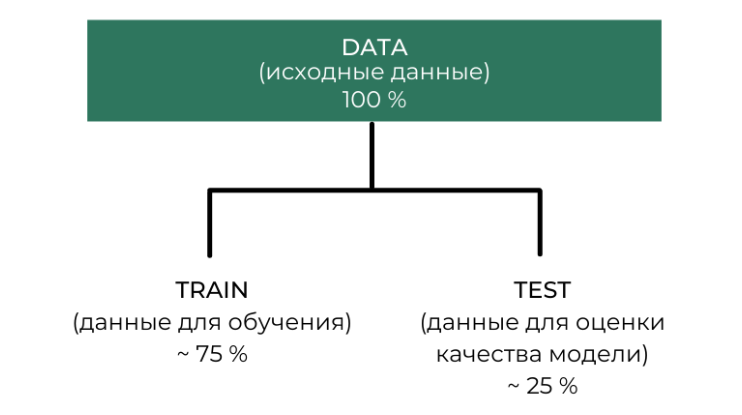

Далее каждый из полученных наборов мы делим на тренировочный (train, используется для обучения модели) и тестовый (test, используется для оценки точности модели). Такое деление осуществляется с помощью специального метода train_test_split() библиотеки sklearn. В параметрах метода (параметр test_size) мы указываем, какую часть исходного датафрейма нужно оставить для тестирования модели. В нашем коде эта часть составляет 25 %, или 0.25.

Не существует идеального соотношения обучающей и тестовой выборки, однако принято выделять на часть обучения больше данных, около ⅔, а оставшуюся часть используют для проверки — ⅓ выборки. Таким образом, самые популярные значения параметра test_size составляют 0.3, 0.25, 0.2.

In [42]:
    # Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
    # Х — данные с информацией об отелях, у — целевая переменная (рейтинги отелей)  
    X = df.drop(['reviewer_score'], axis = 1)  
    y = df['reviewer_score']  
      
    # Загружаем специальный инструмент для разбивки:  
    from sklearn.model_selection import train_test_split  
      
    # Наборы данных с меткой "train" будут использоваться для обучения модели, "test" — для тестирования.  
    # Для тестирования мы будем использовать 25 % от исходного датасета.  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

NameError: name 'df' is not defined

### Создание и обучение модели

Сам процесс создания и тестирования модели занимает всего четыре строчки кода. В качестве алгоритма мы будем использовать популярный и довольно мощный алгоритм RandomForestRegressor. Он реализован в библиотеке sklearn.

In [ ]:
    # Импортируем необходимые библиотеки:  
    from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
    from sklearn import metrics # инструменты для оценки точности модели  
      
    # Создаём модель  
    regr = RandomForestRegressor(n_estimators=100)  
      
    # Обучаем модель на тестовом наборе данных  
    regr.fit(X_train, y_train)  
      
    # Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
    # Предсказанные значения записываем в переменную y_pred  
    y_pred = regr.predict(X_test)

### Оценка качества модели

Для оценки качества модели — точности прогнозов, сделанных моделью, — мы будем использовать метрику (некий числовой показатель), которая называется MAPE (mean absolute percentage error), средняя абсолютная процентная ошибка. Эту метрику очень легко интерпретировать. Если у вас MAPE = 11.4 %, то это говорит о том, что ошибка составила 11.4 % от фактических значений.

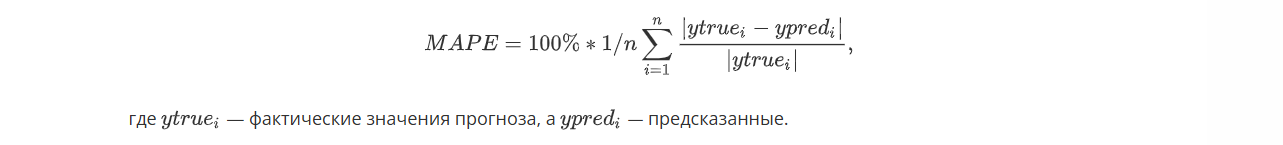

Для расчета MAPE сравним предсказанные нашей моделью значения с реальными и посмотрим на значение ошибки.

In [ ]:
    # Сравниваем предсказанные значения (y_pred) с реальными (y_test) и смотрим, насколько они отличаются  
    # Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений в отношении фактических.  
    print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

Попробуйте запустить весь этот код. Что происходит? Мы видим сообщение об ошибке... Давайте попробуем разобраться в причинах произошедшего.

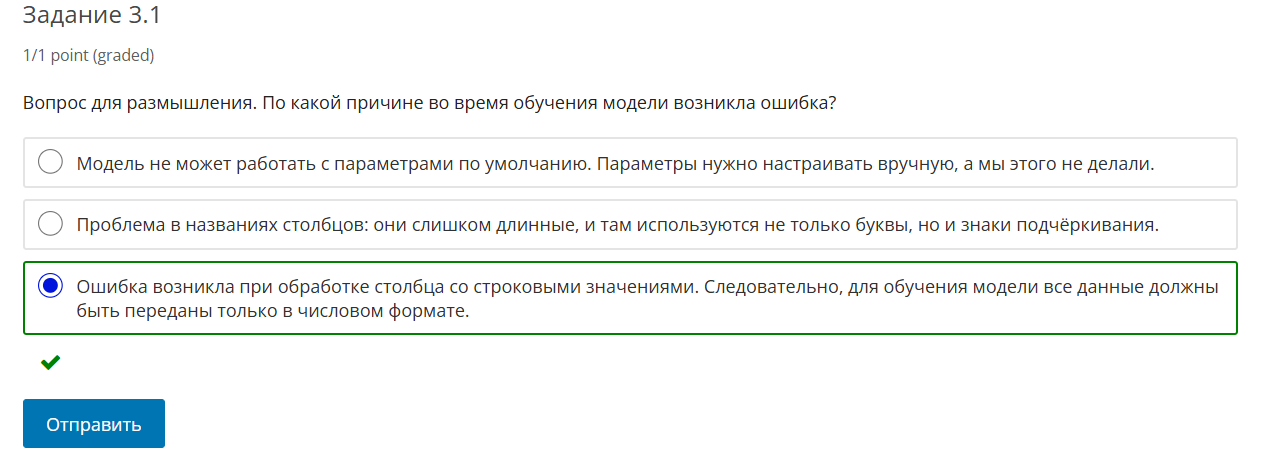

Итак, мы выяснили, что для корректной работы все данные в датафрейме, который вы будете использовать при обучении модели, должны быть в числовых форматах int или float. 

Есть ещё одно ограничение: в столбцах не должно быть пропущенных значений. Вместо каждого пропущенного значения вам нужно будет вычислить и поместить в ячейку максимально близкое к реальности значение.

→ Таким образом, чтобы код, отвечающий за обучение модели, заработал, мы должны использовать в нём датафрейм, содержащий только количественные признаки и не содержащий пропущенных значений.

На первом этапе для создания такого датафрейма давайте просто удалим столбцы, содержащие данные типов object и string и заполним пропущенные значения каким-то одним значением (unknown, нулём или средним арифметическим) для всего столбца.

Для выполнения этих операций вам понадобятся следующие методы библиотеки Pandas:

drop — метод для удаления ненужных строк и столбцов (обратите внимание, что в материалах данного модуля этот метод разрешается использовать только для удаления столбцов);

fillna — метод для заполнения пропущенных значений в столбце или во всём датафрейме.

# 4. Лучший способ добиться успеха — следовать советам

✍ Что делать дальше?

**Повысить точность прогнозов, которые делает модель, с помощью более тщательной подготовки данных**.

При подготовке датасета необходимо будет вспомнить все шаги, которые мы проделывали в модулях EDA. Нам нужно будет не только избавиться от пропущенных значений и нечисловых признаков, но и спроектировать новые признаки на основе информации, уже содержащейся в данных, или используя внешние источники данных, если это возможно. Также мы закодируем и преобразуем признаки, а после отберём лучшие из них.

Задачу, которая стоит перед вами, можно свести к пяти пунктам:

- **Удаление строковых значений**. Вам необходимо удалить из набора данных столбцы, данные в которых представлены не числами.
- **Очистка от пропущенных значений**. На предыдущем шаге мы делали это самым грубым из всех возможных способов, сейчас попробуйте подойти к процессу более гибко.
- **Создание новых признаков**. Мы попробуем создать новые столбцы с данными из существующих данных или с использованием внешних источников.
- **Преобразование признаков**. Применим различные преобразования над признаками вроде нормализации, стандартизации.
- **Отбор признаков**. Используем анализ мультиколлинеарности как шаг отбора признаков для модели.

Ваша задача — при помощи этих шагов и рекомендаций повысить качество предсказания. Чтобы понять, что качество улучшилось, ориентируйтесь на метрику MAPE: чем она меньше, тем лучше. Рассмотрим шаги подробнее.

**Строковые данные**

В исходном наборе данных всего девять столбцов содержат числовые данные. Так что просто удалить все object-значения и считать задачу выполненной не получится. Мы сделали это в прошлом юните, чтобы получить значение метрики. Но чтобы улучшить качество модели, вам перед удалением придётся очень основательно поработать со строковыми данными и извлечь из них как можно больше информации, которую можно представить в числовом виде.

**Пропущенные значения**

Мы уже говорили о том, что в задачах по машинному обучению принято не удалять строки с пустыми значениями, а заполнять их максимально близкими к реальности данными. Используйте знания из модулей очистки данных или вспомните о мере центральной тенденции в юнитах статистики. Попробуйте различные способы и ориентируйтесь на итоговую метрику.

**Новые признаки**

Это, пожалуй, самая творческая часть работы на данном шаге. Создание новых признаков потребует от вас способности вникать в контент, умения подключать к работе интуицию, творческого подхода и готовности к экспериментам. Попробуйте извлечь несколько признаков из даты, проанализируйте датасет на возможность добавления внешних источников данных. При наличии времени разберите текстовые столбцы на признаки.

**Преобразование признаков**

Данные могут быть представлены в невыгодном для модели свете. Используйте изученные вами способы преобразования данных, чтобы сделать данные качественнее.

**Отбор признаков**

Признаки могут дублировать информацию. Анализ мультиколлинеарности мы будем использовать, чтобы выбрать уникальные признаки для модели.

Также перед обучением (после разделения выборки на X и y) мы можем оценить значимость каждого признака для целевой переменной — рейтинг отеля. При помощи теста мы сможем узнать, как географическая долгота отеля и количество негативных отзывов влияют на его рейтинг.

Для оценки значимости категориальных признаков будем использовать тест хи-квадрат, для непрерывных признаков — тест ANOVA.

Для начала разделим признаки по типу, перечислим их:

In [ ]:
# непрерывные признаки
num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts', ...]

# категориальные признаки
cat_cols = ['average_score', 'lat', ...]

Для оценки значимости категориальных переменных будем использовать изученный нами непараметрический тест хи-квадрат, реализованный в библиотеке sklearn.feature_selection.chi2. Метод возвращает массив значений хи-квадрат и p-value для каждого признака. Используем только значения хи-квадрат и выведем их на графике:

In [ ]:
y=y.astype('int')

...
from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

По графику важности категориальных признаков мы можем понять, что признак average_score важнее, чем lat, в определении рейтинга отеля:

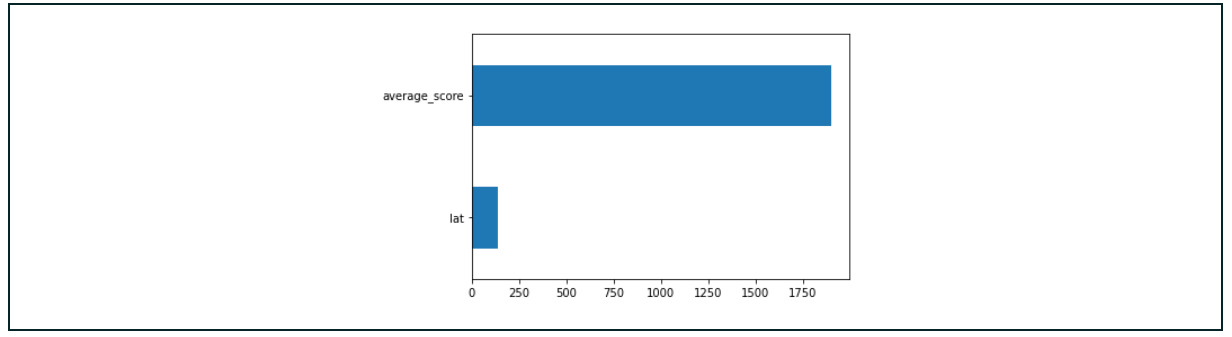

Добавьте и другие категориальные признаки в список cat_cols, чтобы оценить их значимость в определении рейтинга отеля.

Для оценки значимости непрерывных переменных будем использовать функцию f_classif из библиотеки sklearn. В основе метода оценки значимости переменных лежит изученный вами в юнитах по статистике анализ (ANOVA). Основу процедуры составляет обобщение результатов двух выборочных t-тестов для независимых выборок (2-sample t).

Метод возвращает двумерный массив f-статистик и p-value для каждого признака. В качестве меры значимости мы будем использовать значение f-статистики. Чем значение статистики выше, тем меньше вероятность того, что средние значения не отличаются, и тем важнее данный признак для нашей модели.

In [ ]:
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

По  графику важности категориальных переменных мы можем понять, что признак review_total_negative_word_counts важнее, чем total_number_of_reviews, в определении рейтинга отеля:

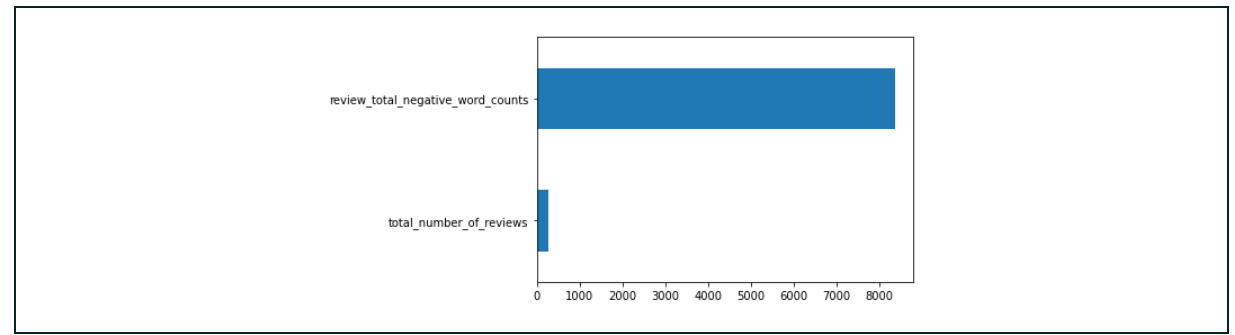

Добавьте и другие непрерывные признаки в список num_cols, чтобы оценить их значимость в определении рейтинга отеля.

Результаты данных тестов вы сможете использовать в своих исследования при отборе признаков: удаляйте менее значимые признаки и сравнивайте результаты качества полученных моделей.

→ Тесты chi2 и f_classif можно использовать для выбора n заданных признаков с наивысшими значениями статистик с помощью метода SelectKBest. Подробнее об этом вы можете прочесть в руководстве Feature selection.

Задание 4.1 (на самопроверку)
Дополните списки num_cols и cat_cols для оценки значимости всех признаков.

Попробуйте применить данные  рекомендации для улучшения качества предсказания. Оцените, насколько изменилась метрика.

→ Если не знаете, с чего начать, ниже мы разместили несколько вопросов. С их помощью вам будет проще понять, какие признаки можно извлечь из данных.

In [126]:
import pandas as pd

hotels = pd.read_csv('data/hotels.csv')
hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


Задание 4.2
1 point possible (graded)
Сколько уникальных названий отелей представлено в наборе данных?

In [127]:
hotels['hotel_name'].describe()

count                                         386803
unique                                          1492
top       Britannia International Hotel Canary Wharf
freq                                            3587
Name: hotel_name, dtype: object

Задание 4.3
2 points possible (graded)
Ответьте на вопросы о дате размещения отзывов.

In [128]:
def days_since(row):
    row = row.split(' ')
    row_new = row[0]
    return row_new

hotels['days_since_review'] = hotels['days_since_review'].apply(days_since).astype('int64')
hotels['days_since_review'].describe()

count    386803.000000
mean        354.387978
std         208.975174
min           0.000000
25%         175.000000
50%         353.000000
75%         527.000000
max         730.000000
Name: days_since_review, dtype: float64

In [129]:
hotels['review_date'] = pd.to_datetime(hotels['review_date'], format='%m/%d/%Y')
hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289,48.845377,2.325643


In [130]:
hotels['review_date'].describe()

count                           386803
mean     2016-08-13 14:41:18.712936704
min                2015-08-04 00:00:00
25%                2016-02-23 00:00:00
50%                2016-08-15 00:00:00
75%                2017-02-09 00:00:00
max                2017-08-03 00:00:00
Name: review_date, dtype: object

In [131]:
unique_tags = set()
hotels['tags'].dropna().apply(
    lambda row: unique_tags.update([tag.strip(" []'\"") for tag in row.split(',')])
)
print(sorted(unique_tags))
len(unique_tags)

['1 King Bed Guest Room', '2 Adjacent Non Communicating Rooms', '2 Adjacent Rooms', '2 Connecting Deluxe Rooms with VIP Service for Kids', '2 Connecting Double Rooms', '2 Connecting Rooms', '2 Connecting Rooms 4 Adults', '2 Connecting Rooms 4 people', '2 Connecting Rooms 5 Adults', '2 Connecting Rooms 5 people', '2 Double Rooms next to each other', '2 Twin Beds Guest Room', '2 double Connecting Rooms', '2 rooms', '3 Connecting Rooms', '3 rooms', '4 Person Suite', '4 rooms', '5 rooms', 'Accessible Double Guest Room', 'Accessible King Room with Lounge Access', 'Accessible Queen Guest Room', 'Accessible Studio Suite', 'Accessible Twin Guest Room', 'Accessible Twin Room', 'Adjacent Double Rooms', 'Adjacent Rooms', 'Aldwych Double Twin Room', 'Ambassador Junior Suite', 'Ambassador Suite', 'Ambassadors Room', 'Amiral Single Room', 'Amsterdam Street Art Double Guest Room', 'Amsterdam Street Art Queen Guest Room', 'Andaz Double Room', 'Andaz King Twin Room', 'Andaz Large King Room', 'Andaz Lar

2368

In [132]:
from collections import Counter

tag_counter = Counter()

for tags in hotels['tags'].dropna():
    tags_list = [tag.strip(" []'\"") for tag in tags.split(',')]
    tag_counter.update(set(tags_list))  # set, чтобы не считать повторения в одном отзыве

most_common_tag, count = tag_counter.most_common(1)[0]
print(f"Самый популярный тег: '{most_common_tag}', встречается в {count} отзывах.")

Самый популярный тег: 'Leisure trip', встречается в 313593 отзывах.


In [133]:
hotels.tags = hotels.tags.apply(lambda x: x[3:-3].split(" ', ' "))
tags = list(hotels.tags.explode().value_counts())
print(tags)
len(tags)

[313593, 230778, 189212, 145373, 100263, 81235, 72000, 61989, 49088, 45836, 35748, 26386, 24151, 23550, 19802, 18623, 16824, 15611, 13062, 12716, 10238, 9287, 7399, 7325, 7227, 6279, 5549, 4763, 4576, 4540, 4485, 4465, 4071, 3993, 3686, 3470, 3392, 3385, 3322, 3292, 3208, 3171, 2956, 2629, 2611, 2469, 2373, 2355, 2309, 2135, 2125, 2005, 1962, 1910, 1890, 1832, 1812, 1808, 1798, 1651, 1643, 1630, 1404, 1331, 1234, 1232, 1202, 1191, 1061, 1060, 1045, 1039, 1022, 1001, 977, 977, 966, 940, 934, 880, 873, 867, 846, 825, 824, 821, 816, 803, 787, 765, 728, 723, 711, 699, 685, 677, 676, 664, 663, 591, 566, 551, 549, 547, 546, 544, 544, 543, 526, 526, 518, 509, 490, 489, 483, 478, 467, 452, 450, 449, 446, 442, 414, 395, 394, 393, 390, 379, 360, 358, 356, 348, 321, 321, 308, 306, 304, 303, 300, 296, 290, 289, 288, 288, 285, 280, 279, 278, 271, 270, 268, 264, 259, 258, 252, 251, 251, 241, 234, 233, 233, 231, 231, 231, 231, 227, 226, 225, 225, 224, 224, 223, 222, 221, 217, 216, 214, 214, 210, 210,

2368

In [134]:
# Найти все теги, содержащие day, days, night, nights
filtered_tags = [tag for tag in unique_tags if any(word in tag for word in ['day', 'days', 'night', 'nights'])]
print(filtered_tags)

['Stayed 25 nights', 'Stayed 23 nights', 'Stayed 6 nights', 'Junior Suite Give me the night', 'Stayed 10 nights', 'Special Offer Double Room 3 nights minimum', 'Stayed 8 nights', 'Stayed 1 night', 'Stayed 22 nights', 'Stayed 11 nights', 'Suite with Knightsbridge View', 'Stayed 4 nights', 'King Room with Knightsbridge View', 'Stayed 17 nights', 'Stayed 19 nights', 'Stayed 18 nights', 'Stayed 27 nights', 'Stayed 5 nights', 'Stayed 15 nights', 'Stayed 21 nights', 'Stayed 2 nights', 'Knightsbridge Suite', 'Stayed 12 nights', 'Stayed 30 nights', 'Stayed 14 nights', 'Stayed 20 nights', 'Stayed 24 nights', 'Stayed 16 nights', 'Stayed 13 nights', 'Stayed 7 nights', 'Stayed 29 nights', 'Stayed 26 nights', 'Stayed 9 nights', 'Stayed 28 nights', 'Stayed 3 nights']


In [135]:
import re

pattern = r'(\d+)\s*(day|days|night|nights)'
for tag in unique_tags:
    match = re.search(pattern, tag)
    if match:
        print(match.group(1))

25
23
6
10
3
8
1
22
11
4
17
19
18
27
5
15
21
2
12
30
14
20
24
16
13
7
29
26
9
28
3


In [136]:
import re

def extract_stay_duration(tags):
    pattern = r'(\d+)\s*(day|days|night|nights)'
    for tag in str(tags).split(','):
        match = re.search(pattern, tag)
        if match:
            return int(match.group(1))
    return None

hotels['duration_of_stay'] = hotels['tags'].apply(extract_stay_duration)
hotels['duration_of_stay'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 386803 entries, 0 to 386802
Series name: duration_of_stay
Non-Null Count   Dtype  
--------------   -----  
386657 non-null  float64
dtypes: float64(1)
memory usage: 3.0 MB


Text(0.5, 1.0, 'Гистограмма длительности пребывания')

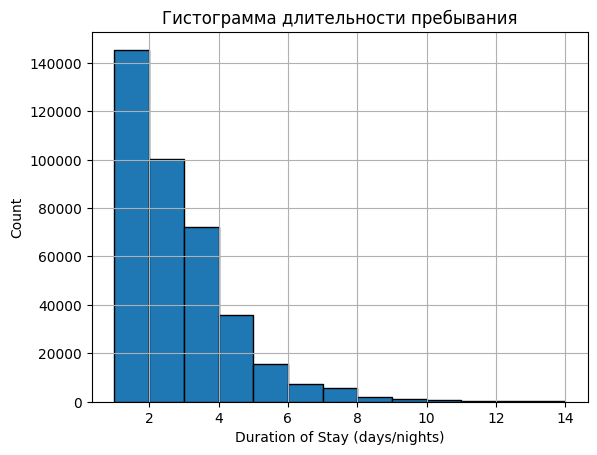

In [137]:
import matplotlib.pyplot as plt

hotels['duration_of_stay'].hist(bins=range(1, 15), edgecolor='black')
plt.xlabel('Duration of Stay (days/nights)')
plt.ylabel('Count')
plt.title('Гистограмма длительности пребывания')

#  5. Побеждаем в соревновании

✍ В нашем курсе и во всей специализации в дальнейшем мы будем использовать площадку Kaggle для проведения соревнований по машинному обучению. Да-да, мы помним, что вы ещё не начали изучение машинного обучения. Но ведь код для создания модели у вас уже есть? Значит, вы вполне можете представить свою первую модель на конкурс.

Итак, давайте рассмотрим последовательность действий, которые вам предстоит совершить:

1. Перейдите по этой ссылке для доступа к закрытому соревнованию на Kaggle, ознакомьтесь с правилами и примите их (вкладка Rules).
2. Используйте базовое решение в качестве основы, попробуйте улучшить его результат. Для этого сделайте сабмит своего решения и ищите себя в лидерборде.
3. Одержите победу в соревновании!

https://www.kaggle.com/competitions/sf-booking

### Как победить в соревновании?

При выполнении этого проекта у каждого должен получиться свой уникальный набор данных, содержащий уникальный набор признаков. Иными словами, мы не стремимся привести всех к единому результату и одинаковому «единственно правильному» набору признаков.

У вас в руках есть немало полезных инструментов и ценных знаний. Настало время экспериментов. Попробуйте «поиграть» с имеющимися в вашем распоряжении данными:

- добавляйте и удаляйте столбцы с признаками;
- попробуйте использовать разные способы представления информации об одном и том же признаке;
- используйте дополнительные источники информации о расположении отелей, чтобы лучше охарактеризовать среду, в которой находится отель;
- используйте различные преобразования признаков;
- разберите дату на несколько новых признаков;
- используйте отбор мультиколлинеарных признаков;
- пробуйте извлекать полезные данные из строковых признаков: в текстах отзывов, адресах или тегах отеля может скрываться важная информация;
- используйте кодирование признаков как оцифровку некоторых строковых значений.

Помните, **ваша главная задача — добиться максимальной точности модели**, которая предсказывает рейтинг отеля. 

После завершения экспериментов **предоставьте свой код для проверки и обратной связи**.

Используйте предложенные рекомендации для улучшения модели. Обучите модель, сделайте сабмит результата. Подумайте, как ещё можно изменить или дополнить признаки, чтобы улучшить модель, сохраните и сделайте сабмит нового решения. Если позволяет время, вы можете создать сколько угодно вариантов решения и выбрать лучшие из них, которые пойдут в лидерборд, но мы рекомендуем сделать **минимум три варианта**.

# 6. Итоги

⭐ Поздравляем! Вы создали свой первый кейс по машинному обучению: самостоятельно очистили довольно сильно загрязнённый датасет, извлекли из него несколько новых признаков и подготовили данные для обучения модели. Также вы приняли участие в соревновании по машинному обучению и вступили в самое большое в мире сообщество действующих дата-сайентистов. Вам есть чем гордиться!

На завершающем этапе вам необходимо выслать свой проект на проверку ментору — это можно сделать через текстовое поле формы ниже. Вы можете сдать своё решение двумя способами:

Kaggle — приложите ссылку на Kaggle-ноутбук.
GitHub, GitLab — приложите ссылку на репозиторий, укажите ваш ник на Kaggle. В таком случае код проекта будет лежать в репозитории, а на Kaggle вы размещаете только файл сабмишна для получения места в лидерборде.

⚡ В случае создания приватного ноутбука/репозитория предоставьте ментору доступ к вашей работе!

Помните, что ментор будет оценивать вашу работу по определённым критериям. Старайтесь держать планку!

Критерии оценивания:

- Качество кода (соблюдение стандартов оформления PEP-8, комментирование кода, README к проекту). Оформление проекта на GitHub, GitLab, Kaggle.
- Очистка данных.
- Исследование данных (качество визуализации, наличие идей, гипотез, комментариев).
- Генерация признаков.
- Отбор признаков.
- Преобразование признаков.
- Качество решения: результат метрики MAPE.

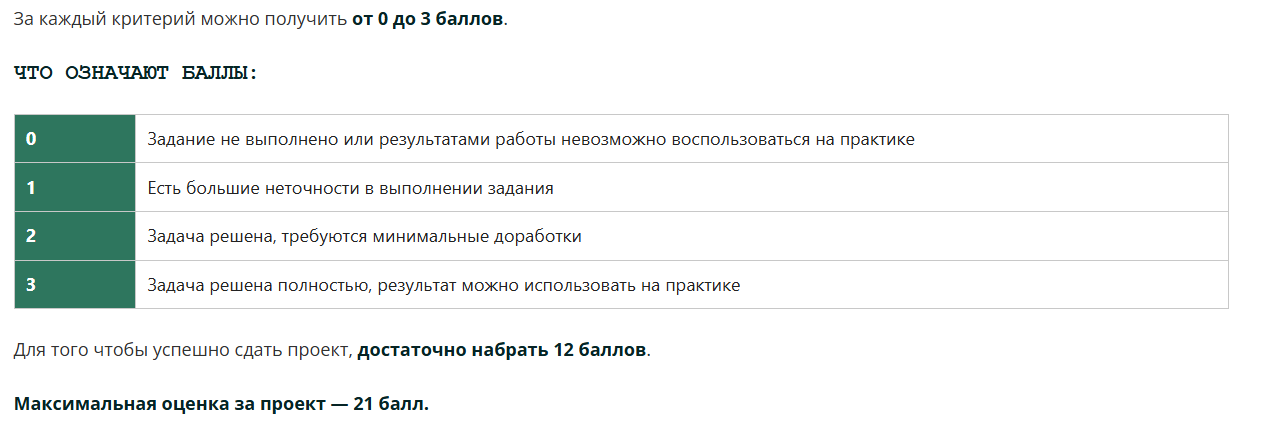